In [1]:
# default_exp eda

# Exploratory Data Analysis

[![Binder](https://notebooks.gesis.org/binder/badge_logo.svg)](https://notebooks.gesis.org/binder/v2/gh/AyrtonB/Merit-Order-Effect/main?filepath=nbs%2Fdev-02-eda.ipynb)

This notebook includes some visualisation and exploration of the price and fuel data for Germany and Great Britain

<br>

### Imports

In [2]:
#exports
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.transforms as mtf

In [3]:
import seaborn as sns

<br>

### Loading Data

In [4]:
#exports
def load_EI_df(EI_fp):
    """Loads the electric insights data and returns a DataFrame"""
    df = pd.read_csv(EI_fp)

    df['local_datetime'] = pd.to_datetime(df['local_datetime'], utc=True)
    df = df.set_index('local_datetime')
    
    return df

In [5]:
%%time

df = load_EI_df('../data/raw/electric_insights.csv')

df.head()

Wall time: 2.29 s


,day_ahead_price,SP,imbalance_price,valueSum,temperature,TCO2_per_h,gCO2_per_kWh,nuclear,biomass,coal,...,demand,pumped_storage,wind_onshore,wind_offshore,belgian,dutch,french,ireland,northern_ireland,irish
local_datetime,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00+00:00,58.05,1,74.74,74.74,-0.6,21278.0,555.0,6.973,0.0,17.650,...,38.329,-0.404,NaN,NaN,0.0,0.0,1.977,0.0,0.0,-0.161
2009-01-01 00:30:00+00:00,56.33,2,74.89,74.89,-0.6,21442.0,558.0,6.968,0.0,17.770,...,38.461,-0.527,NaN,NaN,0.0,0.0,1.977,0.0,0.0,-0.160
2009-01-01 01:00:00+00:00,52.98,3,76.41,76.41,-0.6,21614.0,569.0,6.970,0.0,18.070,...,37.986,-1.018,NaN,NaN,0.0,0.0,1.977,0.0,0.0,-0.160
2009-01-01 01:30:00+00:00,50.39,4,37.73,37.73,-0.6,21320.0,578.0,6.969,0.0,18.022,...,36.864,-1.269,NaN,NaN,0.0,0.0,1.746,0.0,0.0,-0.160
2009-01-01 02:00:00+00:00,48.70,5,59.00,59.00,-0.6,21160.0,585.0,6.960,0.0,17.998,...,36.180,-1.566,NaN,NaN,0.0,0.0,1.730,0.0,0.0,-0.160


<br>

We'll do the same for the German Energy-Charts and ENTSOE data

In [6]:
#exports
def load_DE_df(EC_fp, ENTSOE_fp):
    """Loads the energy-charts and ENTSOE data and returns a DataFrame"""
    # Energy-Charts
    df_DE = pd.read_csv(EC_fp)

    df_DE['local_datetime'] = pd.to_datetime(df_DE['local_datetime'], utc=True)
    df_DE = df_DE.set_index('local_datetime')
    
    # ENTSOE
    df_ENTSOE = pd.read_csv(ENTSOE_fp)

    df_ENTSOE['local_datetime'] = pd.to_datetime(df_ENTSOE['local_datetime'], utc=True)
    df_ENTSOE = df_ENTSOE.set_index('local_datetime')
    
    # Combining data
    df_DE['demand'] = df_DE.sum(axis=1)
    
    s_price = df_ENTSOE['DE_price']
    df_DE['price'] = s_price[~s_price.index.duplicated(keep='first')]
    
    return df_DE

In [7]:
df_DE = load_DE_df('../data/raw/energy_charts.csv', '../data/raw/ENTSOE_DE_price.csv')

df_DE.head()

,Biomass,Brown Coal,Gas,Hard Coal,Hydro Power,Oil,Others,Pumped Storage,Seasonal Storage,Solar,Uranium,Wind,Net Balance,demand,price
local_datetime,,,,,,,,,,,,,,,
2010-01-03 23:00:00+00:00,3.637,16.533,4.726,10.078,2.331,0.000,0.0,0.052,0.068,0.0,16.826,0.635,-1.229,53.657,NaN
2010-01-04 00:00:00+00:00,3.637,16.544,4.856,8.816,2.293,0.000,0.0,0.038,0.003,0.0,16.841,0.528,-1.593,51.963,NaN
2010-01-04 01:00:00+00:00,3.637,16.368,5.275,7.954,2.299,0.000,0.0,0.032,0.000,0.0,16.846,0.616,-1.378,51.649,NaN
2010-01-04 02:00:00+00:00,3.637,15.837,5.354,7.681,2.299,0.000,0.0,0.027,0.000,0.0,16.699,0.630,-1.624,50.540,NaN
2010-01-04 03:00:00+00:00,3.637,15.452,5.918,7.498,2.301,0.003,0.0,0.020,0.000,0.0,16.635,0.713,-0.731,51.446,NaN


<br>

### Stacked-Fuels Time-Series

We'll create a stacked plot of the different generation types over time. We'll begin by cleaning the dataframe and merging columns so that it's ready for plotting, we'll also take the 7-day rolling average to make long-term trends clearer.

In [8]:
#exports
def clean_EI_df_for_plot(df, freq='7D'):
    """Cleans the electric insights dataframe for plotting"""
    fuel_order = ['Imports & Storage', 'nuclear', 'biomass', 'gas', 'coal', 'hydro', 'wind', 'solar']
    interconnectors = ['french', 'irish', 'dutch', 'belgian', 'ireland', 'northern_ireland']

    df = (df
          .copy()
          .assign(imports_storage=df[interconnectors+['pumped_storage']].sum(axis=1))
          .rename(columns={'imports_storage':'Imports & Storage'})
          .drop(columns=interconnectors+['demand', 'pumped_storage'])
          [fuel_order]
         )

    df_resampled = df.astype('float').resample(freq).mean()
    return df_resampled

In [9]:
df_plot = clean_EI_df_for_plot(df)

df_plot.head()

,Imports & Storage,nuclear,biomass,gas,coal,hydro,wind,solar
local_datetime,,,,,,,,
2009-01-01 00:00:00+00:00,-0.039018,5.768536,0.0,16.295098,20.132420,0.355890,0.390015,0.0
2009-01-08 00:00:00+00:00,-0.921768,5.582896,0.0,16.381083,21.699726,0.551753,1.151545,0.0
2009-01-15 00:00:00+00:00,-0.024241,5.559986,0.0,14.839983,20.446309,0.704382,1.483002,0.0
2009-01-22 00:00:00+00:00,0.182830,6.228411,0.0,14.467771,20.590661,0.562277,0.938827,0.0
2009-01-29 00:00:00+00:00,0.120204,6.799589,0.0,13.965650,21.349710,0.519632,1.362611,0.0


<br>

We'll also define the colours we'll use for each fuel-type

N.b. the colour palette used is from [this paper](https://www.sciencedirect.com/science/article/pii/S0301421516307017)

In [10]:
fuel_colour_dict_rgb = {
    'Imports & Storage' : (121,68,149), 
    'nuclear' : (77,157,87), 
    'biomass' : (168,125,81), 
    'gas' : (254,156,66), 
    'coal' : (122,122,122), 
    'hydro' : (50,120,196), 
    'wind' : (72,194,227), 
    'solar' : (255,219,65),
}

<br>

However we need to convert from rgb to matplotlib plotting colours (0-1 not 0-255)

In [11]:
#exports
def rgb_2_plt_tuple(r, g, b):
    """converts a standard rgb set from a 0-255 range to 0-1"""
    plt_tuple = tuple([x/255 for x in (r, g, b)])
    return plt_tuple

def convert_fuel_colour_dict_to_plt_tuple(fuel_colour_dict_rgb):
    """Converts a dictionary of fuel colours to matplotlib colour values"""
    fuel_colour_dict_plt = fuel_colour_dict_rgb.copy()
    
    fuel_colour_dict_plt = {
        fuel: rgb_2_plt_tuple(*rgb_tuple) 
        for fuel, rgb_tuple 
        in fuel_colour_dict_plt.items()
    }
    
    return fuel_colour_dict_plt

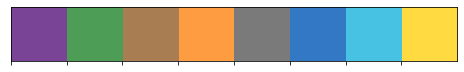

In [12]:
fuel_colour_dict = convert_fuel_colour_dict_to_plt_tuple(fuel_colour_dict_rgb)

sns.palplot(fuel_colour_dict.values())

<br>

Finally we can plot the stacked fuel plot itself

In [13]:
#exports
def hide_spines(ax, positions=["top", "right"]):
    """
    Pass a matplotlib axis and list of positions with spines to be removed
    
    Parameters:
        ax:          Matplotlib axis object
        positions:   Python list e.g. ['top', 'bottom']
    """
    assert isinstance(positions, list), "Position must be passed as a list "

    for position in positions:
        ax.spines[position].set_visible(False)
        
def stacked_fuel_plot(
    df, 
    ax=None, 
    save_path=None, 
    dpi=150,
    fuel_colour_dict = {
    'Imports & Storage' : rgb_2_plt_tuple(121,68,149), 
    'nuclear' : rgb_2_plt_tuple(77,157,87), 
    'biomass' : rgb_2_plt_tuple(168,125,81), 
    'gas' : rgb_2_plt_tuple(254,156,66), 
    'coal' : rgb_2_plt_tuple(122,122,122), 
    'hydro' : rgb_2_plt_tuple(50,120,196), 
    'wind' : rgb_2_plt_tuple(72,194,227), 
    'solar' : rgb_2_plt_tuple(255,219,65),
}
):
    """Plots the electric insights fuel data as a stacked area graph"""
    df = df[fuel_colour_dict.keys()]
    
    if ax == None:
        fig = plt.figure(figsize=(10, 5), dpi=dpi)
        ax = plt.subplot()
    
    ax.stackplot(df.index.values, df.values.T, labels=df.columns.str.capitalize(), linewidth=0.25, edgecolor='white', colors=list(fuel_colour_dict.values()))

    plt.rcParams['axes.ymargin'] = 0
    ax.spines['bottom'].set_position('zero')
    hide_spines(ax)

    ax.set_xlim(df.index.min(), df.index.max())
    ax.legend(ncol=4, bbox_to_anchor=(0.85, 1.15), frameon=False)
    ax.set_ylabel('Generation (GW)')

    if save_path:
        fig.savefig(save_path)
        
    return ax

<AxesSubplot:ylabel='Generation (GW)'>

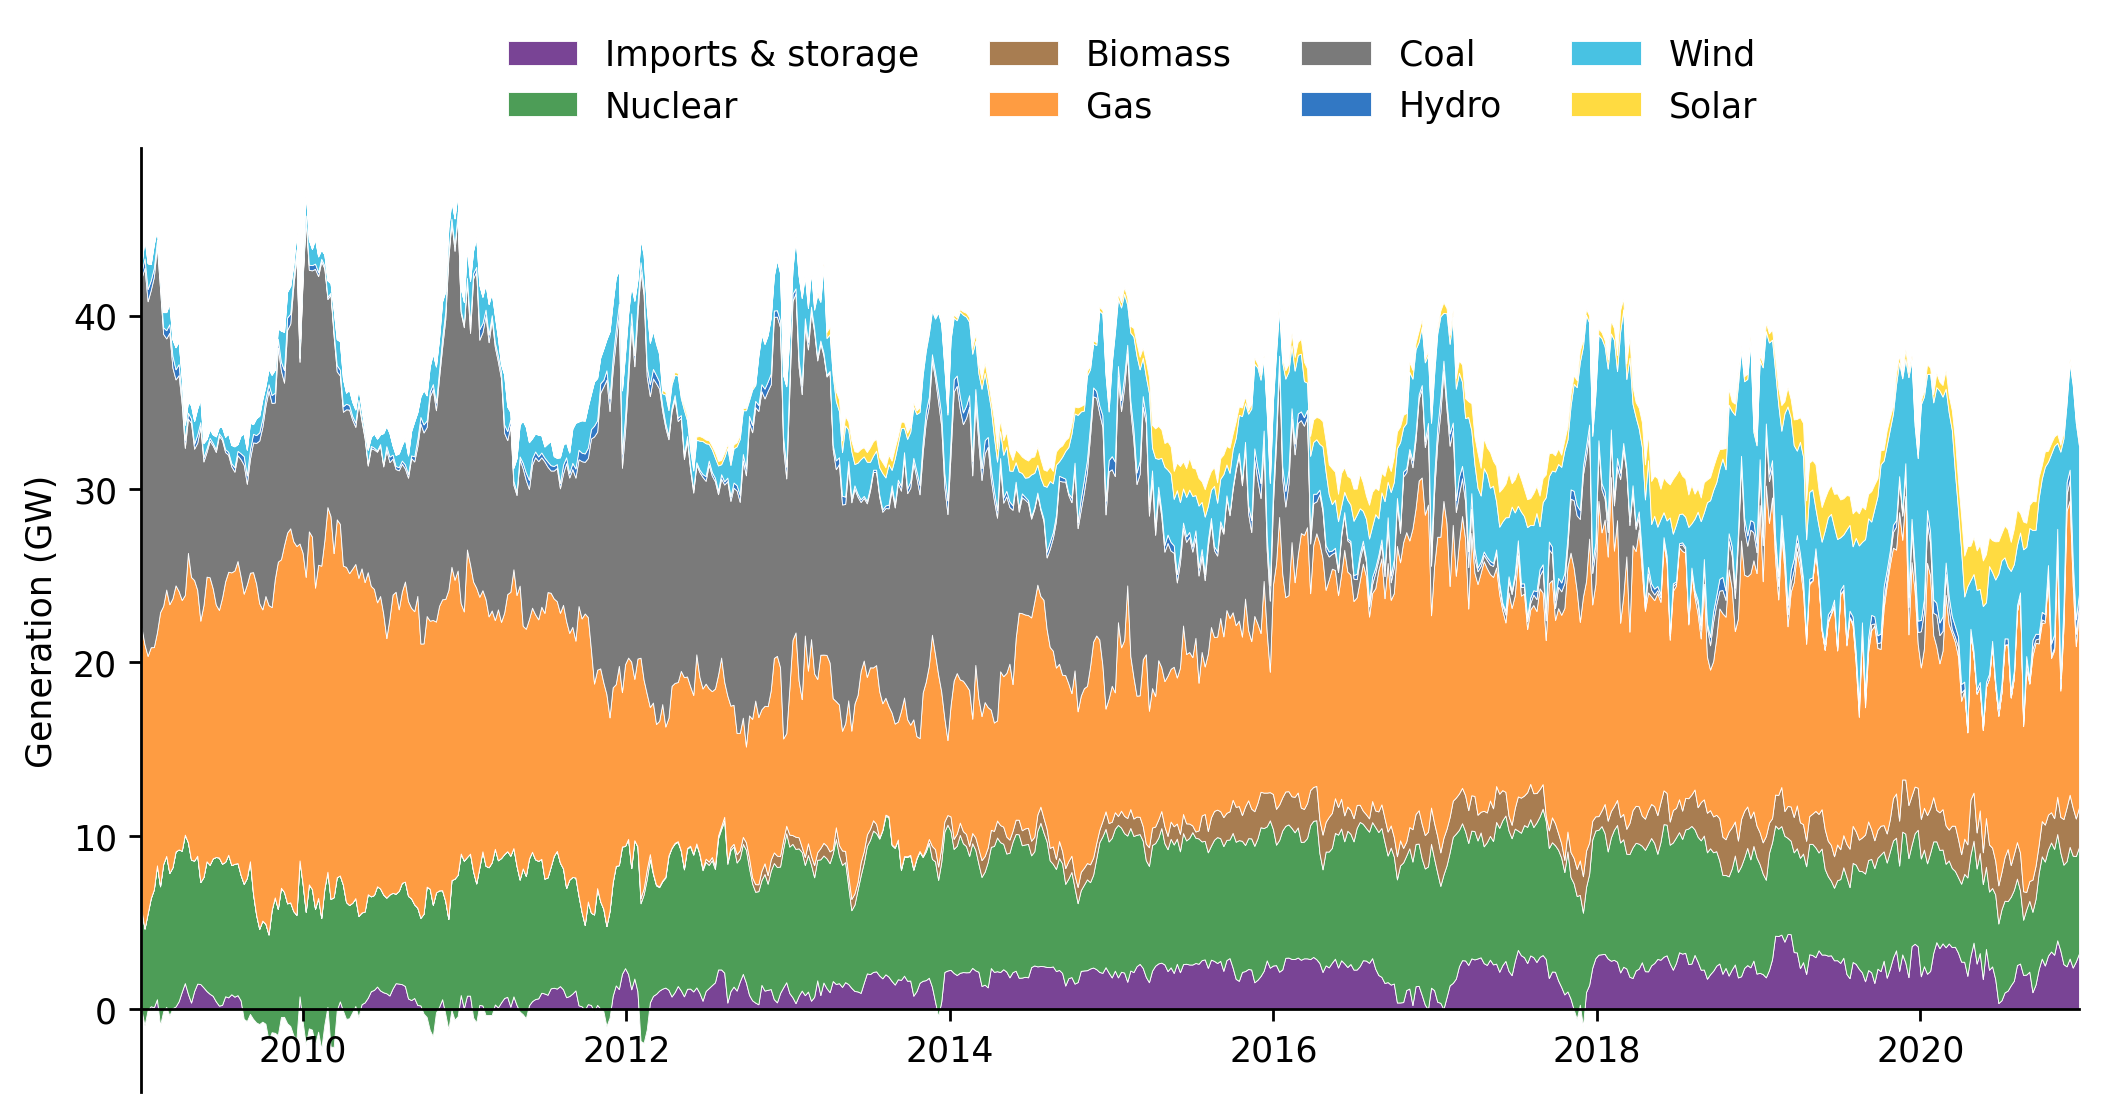

In [14]:
stacked_fuel_plot(df_plot, dpi=250)

In [38]:
#exports
def clean_EC_df_for_plot(
    df_EC, 
    freq='7D', 
    fuel_order=['Imports & Storage', 'nuclear', 'biomass', 
                'gas', 'coal', 'hydro', 'wind', 'solar']
):
    """Cleans the electric insights dataframe for plotting"""

    df_EC_clean = (pd
                   .DataFrame(index=df_EC.index)
                   .assign(nuclear=df_EC['Uranium'])
                   .assign(biomass=df_EC['Biomass'])
                   .assign(gas=df_EC['Gas'])
                   .assign(coal=df_EC['Brown Coal']+df_EC['Hard Coal'])
                   .assign(hydro=df_EC['Hydro Power'])
                   .assign(wind=df_EC['Wind'])
                   .assign(solar=df_EC['Solar'])
                  )

    df_EC_clean['Imports & Storage'] = df_EC['Pumped Storage'] + df_EC['Seasonal Storage'] + df_EC['Net Balance']
    df_EC_clean = df_EC_clean[fuel_order].interpolate()

    df_EC_resampled = df_EC_clean.astype('float').resample(freq).mean()
    
    return df_EC_resampled

<AxesSubplot:ylabel='Generation (GW)'>

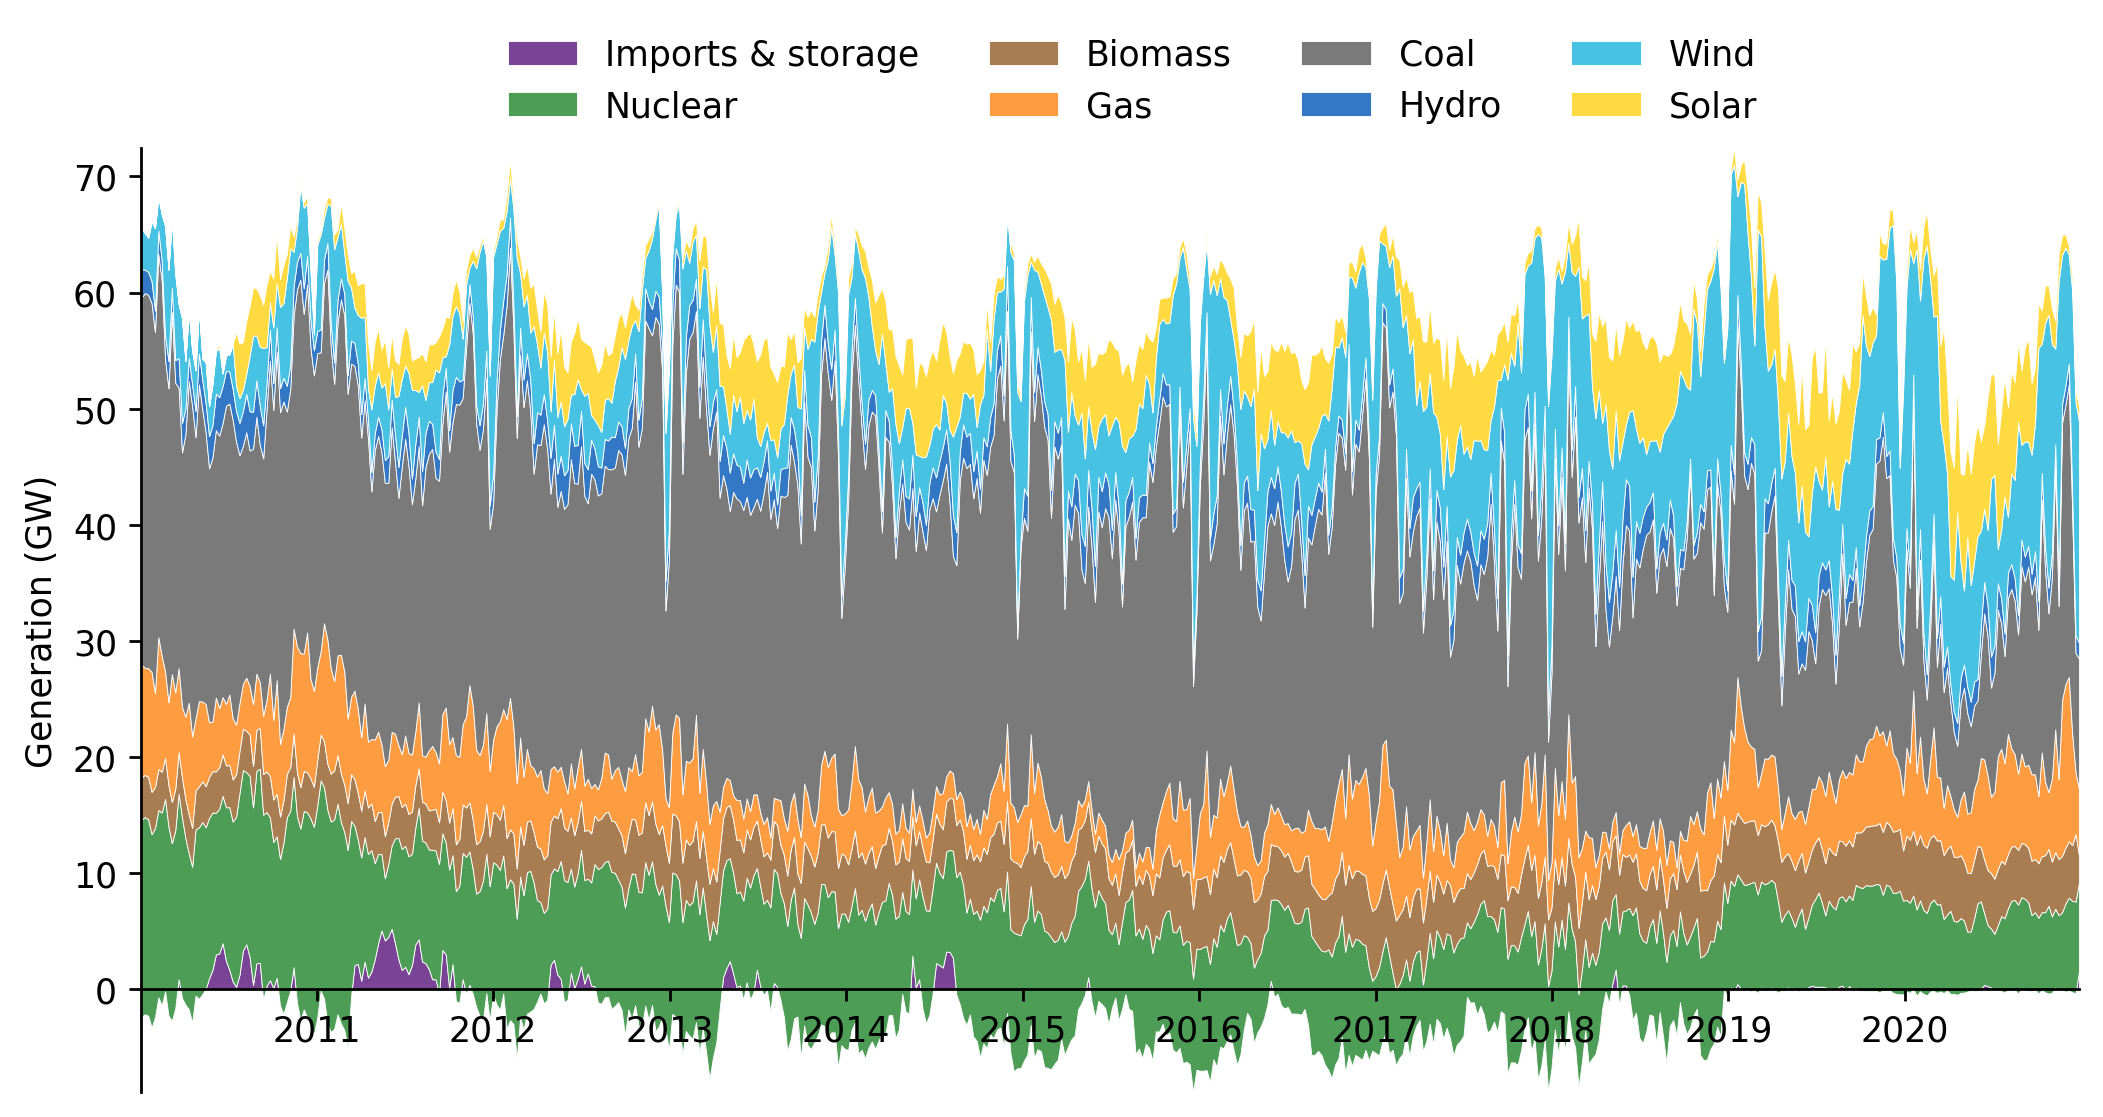

In [35]:
df_DE_plot = clean_EC_df_for_plot(df_DE)
stacked_fuel_plot(df_DE_plot, dpi=250)

In [39]:
#hide
from nbdev.export import *
notebook2script()

Converted dev-01-retrieval.ipynb.
Converted dev-02-eda.ipynb.
Converted dev-03-lowess.ipynb.
Converted dev-04-price-surface-estimation.ipynb.
Converted dev-05-price-moe.ipynb.
Converted dev-06-carbon-surface-estimation-and-moe.ipynb.
Converted dev-07-prediction-confidence-and-intervals.ipynb.
Converted dev-08-hyper-parameter-tuning.ipynb.
Converted dev-09-tables-and-figures.ipynb.
Converted dev-10-ci-cd.ipynb.
Converted ug-01-hydro-seasonality.ipynb.
Converted ug-02-ligo.ipynb.
Converted ug-03-power-curve.ipynb.
Converted ug-04-electricity-prices.ipynb.
Converted ug-05-data-retrieval.ipynb.
